我们首先想要发问的隐藏层的作用。在之前的XOR函数中，我们提出”多层神经网络能够描绘出一条曲线作为决策边界，以此为基础处理单层神经网络无法处理的复杂问题“，这可能让许多人产生了“是增加层数帮助了神经网络”的错觉。实际上并非如此。

在神经网络的隐藏层中，存在两个关键的元素，一个是加和函数入，另一个是h(z)除了输入层之外，任何层的任何神经元上都会有加和的性质，因为神经元有“多进单出”的性质，可以一次性输入多个信号，但是输出只能有一个，因此输入神经元的信息必须以某种方式进行整合，否则神经元就无法将信息传递下去，而最容易的整合方式就是加和入。因此我们可以认为加和》是神经元自带的性质，只要增加更多的层，就会有更多的加和。但是h(z)的存在却不是如此，即便隐藏层上没有h(z)(或h(z)是一个恒等函数) ，神经网络依然可以从第一层走到最后一层。让我们来试试看，在XOR中，假设隐藏层上没有h(z)的话，会发生什么:

# 假设隐藏层上没有h(z)：

In [38]:
import torch

In [51]:
X = torch.tensor([[1,0,0],[1,1,0],[1,0,1],[1,1,1]],dtype = torch.float32)
xorgate = torch.tensor([0,1,1,0],dtype = torch.float32)

In [43]:
def And(X):
    w = torch.tensor([-0.2,0.15,0.15],dtype = torch.float32 ).reshape(3,1)
    zhat = torch.mm(X,w)
    andhat = torch.tensor([int(x) for x in zhat >= 0],dtype = torch.float32).reshape(4,1)
    return andhat
def OR(X):
    w = torch.tensor([-0.08,0.15,0.15],dtype = torch.float32)
    zhat = torch.mv(X,w)
    # yhat = torch.tensor([int(x) for x in zhat > 0],dtype = torch.float32)
    return zhat
def NAND(X):
    w = torch.tensor([0.23,-0.15,-0.15],dtype = torch.float32)
    zhat = torch.mv(X,w)
    # yhat = torch.tensor([int(x) for x in zhat > 0],dtype = torch.float32)
    return zhat

In [44]:
def XOR(X):
    # 输入值：
    input_1 = X
    # 中间层：
    sigma_nand = NAND(input_1)
    sigma_or = OR(input_1)
    x0 = torch.tensor([[1],[1],[1],[1]],dtype = torch.float32)
    # 输出层：
    input_2 = torch.cat((x0,sigma_nand.reshape(4,1),sigma_or.reshape(4,1)),dim = 1)
    y_and = And(input_2)
    # print("NAND:",y_nand)
    # print("OR",y_or)
    return y_and

In [50]:
print(XOR(X))
xorgate

tensor([[0.],
        [0.],
        [0.],
        [0.]])


tensor([0., 1., 1., 0.])

很明显，此时XOR函数的预测结果与真实的xorgate不一致。当隐藏层的h(z)是恒等叠加层并不能够解决XOR这样的非线性问题。从数学上来看，这函数或不存在时，也非常容易理解。

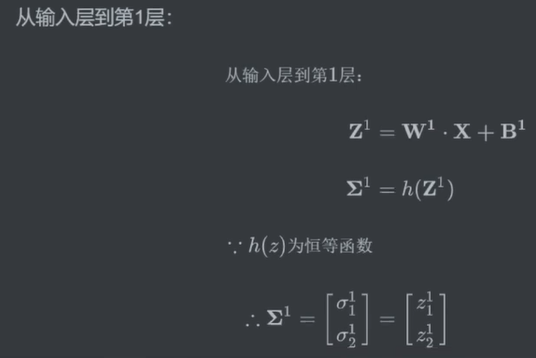

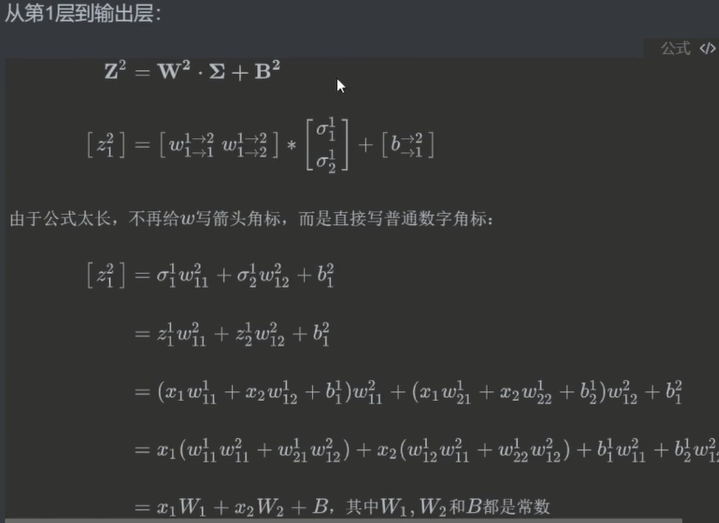

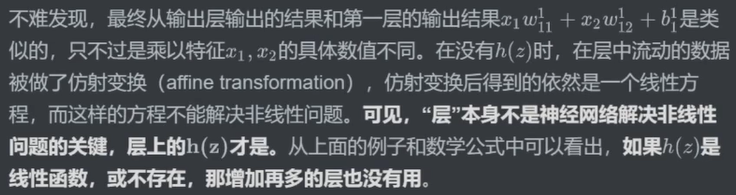

那是不是任意非线性函数作为h(z)都可以解决问题呢?让我们来试试看，在XOR例子中如果不使用阶跃函数，而使用sigmoid函数作为h(z)，会发生什么。

#  使用sigmoid函数代替阶跃函数

In [55]:
import torch
X = torch.tensor([[1,0,0],[1,1,0],[1,0,1],[1,1,1]],dtype = torch.float32)
xorgate = torch.tensor([0,1,1,0],dtype = torch.float32)
def And(X):
    w = torch.tensor([-0.2,0.15,0.15],dtype = torch.float32 ).reshape(3,1)
    zhat = torch.mm(X,w)
    andhat = torch.tensor([int(x) for x in zhat >= 0],dtype = torch.float32).reshape(4,1)
    return andhat
def OR(X):
    w = torch.tensor([-0.08,0.15,0.15],dtype = torch.float32)
    zhat = torch.mv(X,w)
    # h(z)，使用sigmoid函数
    sigma = torch.sigmoid(zhat)
    return sigma
def NAND(X):
    w = torch.tensor([0.23,-0.15,-0.15],dtype = torch.float32)
    zhat = torch.mv(X,w)
    # h(z)，使用sigmoid函数
    sigma = torch.sigmoid(zhat)
    return sigma

In [56]:
def XOR(X):
    # 输入值：
    input_1 = X
    # 中间层：
    sigma_nand = NAND(input_1)
    sigma_or = OR(input_1)
    x0 = torch.tensor([[1],[1],[1],[1]],dtype = torch.float32)
    # 输出层：
    input_2 = torch.cat((x0,sigma_nand.reshape(4,1),sigma_or.reshape(4,1)),dim = 1)
    y_and = And(input_2)
    # print("NAND:",y_nand)
    # print("OR",y_or)
    return y_and

In [59]:
print(XOR(X))
xorgate

tensor([[0.],
        [0.],
        [0.],
        [0.]])


tensor([0., 1., 1., 0.])

可以发现，如果将h(z)换成sigmoid函数，XOR结构的神经网络同样会失效!可见，<b>即便是使用了h(z)，也不一定能够解决曲线分类的问题。在不适合的非线性函数加持下，神经网络的层数再多也无法起效。</b>所以，h(z)是真正能够让神经网络算法“活起来”的关键，没有搭配合适h(z)的神经网络结构是无用的，<b>而h(z)正是神经网络中最关键的概念之一激活函数 (activation function)

# 激活函数

<li>关键概念:激活函数<br>
在人工神经网络的神经元上，根据一组输入定义该神经元的输出结果的函数，就是激活函数。激活函数一般都是非线性函数，它出现在神经网络中除了输入层以外的每层的每个神经元上。

&emsp;&emsp;经过前面的介绍与铺垫，到这里相信大家已经充分理解激活函数的作用了。神经网络中可用的激活函数多达数十种。<br>
&emsp;&emsp;但机器学习中常用的激活函数只有<b>恒等函数 (identity function) ，阶跃函数 (sign) ，sigmoid函数，ReLU，tanh,softmax这六种，</b>其中Softmax与恒等函数几乎不会出现在隐藏层上，Sign、Tanh几乎不会出现在输出层上，ReLU与Sigmoid则是两种层都会出现，并且应用广泛。幸运的是，这6种函数我们在之前的课程中已经全部给大家介绍完毕。在这里，我们将总结性声明一下输出层的g(z)与隐藏层的h(z)之间的区别，以帮助大家获得更深的理解:

    1、虽然都是激活函数，但隐赢层和输出层上的激活函数作用是完全不一样的。输出层的激活函数g(z)是为了让神经网络能够输出不同类型的标签而存在的。其中恒等函数用于回归，sigmoid函数用于二分类，softmax用于多分类。换句说，g(z)仅仅与输出结果的表现形式有关，与神经网络的效果无关，也因此它可以使用线性的恒等函数。但隐藏层的激活函数就不同了，如我们之前尝试,的XOR，隐藏层上的激活函数h(z)的选择会影响神经网络的效果，而线性的h(z)是会让神经网络的结构失效的.

    2.在同一个神经网络中，g(z)与h(z)可以是不同的，并且在大多数运行回归和多分类的神经网络时，他们也的确是不同的。每层上的h(z)可以是不同的，但是同一层上的激活函数必须一致。

我们可以通过下面的这段代码来实际体会一下，h(z)影响模型效果，而g(z)只影响模型输出结果的形式的事实。之前我们曾经尝试过以下几种情况:

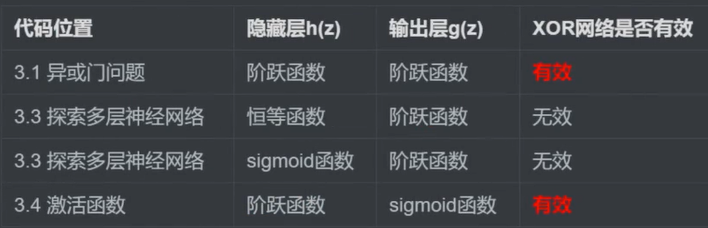

从结果可以看出，只要隐藏层的h(2)是阶跃函数，XOR网络就一定能有效，这与输当我们提到“激活函出层g(z)是什么函数完全无关。从这里开始，若没有特别说明，数”时，特指隐藏层上的激活函数h(2)。当需要表达输出层上的激活函数时，我们需称其为“输出层激活函数”(out activation)